<b>The purpose is to classify a given silhouette as one of four types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.The images were acquired by a camera looking downwards at the model vehicle from a fixed angle of elevation (34.2 degrees to the horizontal). The vehicles were placed on a diffuse backlit surface (lightbox). The vehicles were painted matte black to minimise highlights. The images were captured using a CRS4000 framestore connected to a vax 750. </b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import zscore

In [2]:
vehicle_df =  pd.read_csv("vehicle.csv")
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [3]:
vehicle_df.shape

(846, 19)

Here we have given 846 records with 19 columns.Out of these 19 columns Class is dependent column and rest are independent column

In [4]:
vehicle_df["class"].unique()

array(['van', 'car', 'bus'], dtype=object)

In our target column we have given three kind of vehices that is Van, car and bus

In [5]:
class_wise_distribution = vehicle_df.groupby("class")["class"].count()
class_wise_distribution

class
bus    218
car    429
van    199
Name: class, dtype: int64

Here out of total 846 records we have 218 records of Bus , 429 records of Car and 199 records of Van

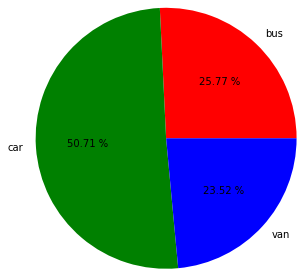

In [6]:
plt.pie(x = class_wise_distribution.values,labels=class_wise_distribution.keys(),radius =1.5,colors=["red","green","blue"],autopct="%.2f %%")
plt.show()

Here we can see we have 50.71 % of the records of car while bus and van records contains 25.77% and 23.52% respectively.

In [7]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

Every column except Target column numeric datatype. Here we can also see some null value in the data like column circularity has 5 null values, distance_circularity has 4 null value and so on. Total missing values in any columns ranges from 1 to 6

In [8]:
print(vehicle_df.isnull().sum())
print("Total Null Values " , vehicle_df.isnull().sum().sum())

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64
Total Null Values  41


Here we have total 41 null values . I am going to convert these null values with the median value of their respoective column

In [9]:
vehicle_df =  vehicle_df.fillna(vehicle_df.median())

In [10]:
vehicle_df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.823877             82.100473    168.874704   
std       8.234474     6.134272             15.741569     33.401356   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.677305                 8.567376     168.887707   
std                7.882188                 4.601217      33.197710   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean       40.936170               20.580378                 147.998818   
std         7.811882                2.588558                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       846.000000         846.000000                 846.000000   
mean        188.596927         439.314421                 174.706856   
std          31.360427         176.496341                  32.546277   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.250000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         586.750000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   846.000000      846.000000        846.000000   
mean                     72.443262        6.361702         12.600473   
std                       7.468734        4.903244          8.930962   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        846.000000     846.000000  
mean         188.918440     195.632388  
std            6.152247       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

Here describe function shows the minimum , maximum and average value of each column . ALso shows the median value first quartile and third quartile of each column

In [11]:
feature_column =  vehicle_df.drop("class",axis=1)

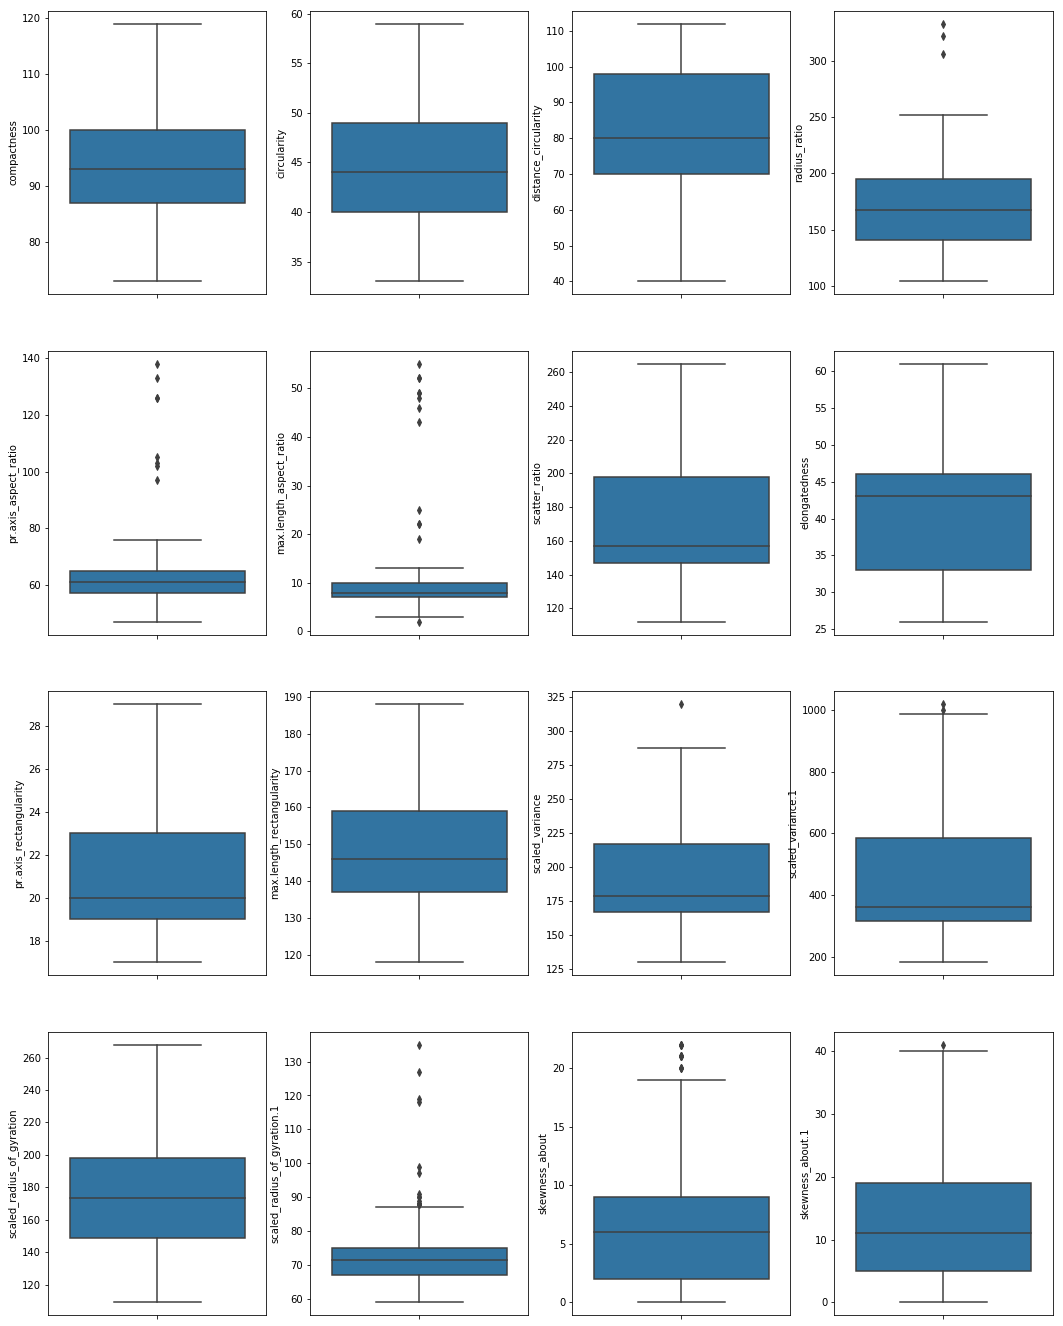

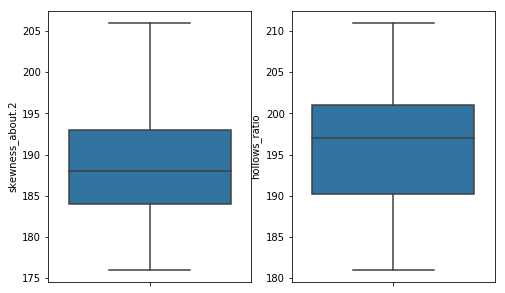

In [12]:
columns =  feature_column.columns
k=0
fig,ax1 = plt.subplots(nrows=4,ncols=4,figsize = (18,24))
fig,ax2 = plt.subplots(nrows=1,ncols=2,figsize = (8,5),squeeze=False)
for i in np.arange(4):
    for j in np.arange(4):
            sns.boxplot(y=vehicle_df[columns[k]],ax = ax1[i][j])
            k=k+1
for j in np.arange(0,2):
    sns.boxplot(y=vehicle_df[columns[k]],ax = ax2[0][j])
    k=k+1            

There are some outliers in some column. Here I am going to replace these outliers with the median value of these column

In [13]:
# outliers in column radis_ratio 
print("Total No. of Outliers in radius_ratio column to be replaced with median is:", len(vehicle_df[vehicle_df["radius_ratio"] >290]))
median_value =  vehicle_df["radius_ratio"].median()
vehicle_df["radius_ratio"] =  vehicle_df.apply(lambda x :median_value if x["radius_ratio"]>290 else x["radius_ratio"],axis=1)

Total No. of Outliers in radius_ratio column to be replaced with median is: 3


In [14]:
# outliers in column pr.axis_aspect_ratio 
print("Total No. of Outliers in pr.axis_aspect_ratio column to be replaced with median is :", len(vehicle_df[vehicle_df["pr.axis_aspect_ratio"] >90]))
median_value =  vehicle_df["pr.axis_aspect_ratio"].median()
vehicle_df["pr.axis_aspect_ratio"] =  vehicle_df.apply(lambda x :median_value if x["pr.axis_aspect_ratio"]>90 else x["pr.axis_aspect_ratio"],axis=1)

Total No. of Outliers in pr.axis_aspect_ratio column to be replaced with median is : 8


In [15]:
# outliers in column max.length_aspect_ratio
print("Total No. of Outliers in max.length_aspect_ratio column to be replaced with median is :", len(vehicle_df[(vehicle_df["max.length_aspect_ratio"] >15) | (vehicle_df["max.length_aspect_ratio"] <3)]))
median_value =  vehicle_df["max.length_aspect_ratio"].median()
vehicle_df["max.length_aspect_ratio"] =  vehicle_df.apply(lambda x :median_value if (x["max.length_aspect_ratio"]>15) | (x["max.length_aspect_ratio"] <3) else x["max.length_aspect_ratio"],axis=1)

Total No. of Outliers in max.length_aspect_ratio column to be replaced with median is : 13


In [16]:
# outliers in column scaled_variance
print("Total No. of Outliers in scaled_variance column to be replaced with median is :", len(vehicle_df[vehicle_df["scaled_variance"] >300]))
median_value =  vehicle_df["scaled_variance"].median()
vehicle_df["scaled_variance"] =  vehicle_df.apply(lambda x :median_value if x["scaled_variance"]>300 else x["scaled_variance"],axis=1)

Total No. of Outliers in scaled_variance column to be replaced with median is : 1


In [17]:
 # outliers in column scaled_variance.1
print("Total No. of Outliers in scaled_variance.1 column to be replaced with median is :", len(vehicle_df[vehicle_df["scaled_variance.1"] >990]))
median_value =  vehicle_df["scaled_variance.1"].median()
vehicle_df["scaled_variance.1"] =  vehicle_df.apply(lambda x :median_value if x["scaled_variance.1"]>990 else x["scaled_variance.1"],axis=1)

Total No. of Outliers in scaled_variance.1 column to be replaced with median is : 2


In [18]:
 # outliers in column scaled_radius_of_gyration.1
print("Total No. of Outliers in scaled_radius_of_gyration.1 column to be replaced with median is :", len(vehicle_df[vehicle_df["scaled_radius_of_gyration.1"] >87]))
median_value =  vehicle_df["scaled_radius_of_gyration.1"].median()
vehicle_df["scaled_radius_of_gyration.1"] =  vehicle_df.apply(lambda x :median_value if x["scaled_radius_of_gyration.1"]>87 else x["scaled_radius_of_gyration.1"],axis=1)

Total No. of Outliers in scaled_radius_of_gyration.1 column to be replaced with median is : 15


In [19]:
 # outliers in column skewness_about
print("Total No. of Outliers in skewness_about column to be replaced with median is :", len(vehicle_df[vehicle_df["skewness_about"] >19]))
median_value =  vehicle_df["skewness_about"].median()
vehicle_df["skewness_about"] =  vehicle_df.apply(lambda x :median_value if x["skewness_about"]>19 else x["skewness_about"],axis=1)

Total No. of Outliers in skewness_about column to be replaced with median is : 12


In [20]:
# outliers in column skewness_about.1
print("Total No. of Outliers in skewness_about.1 column to be replaced with median is :", len(vehicle_df[vehicle_df["skewness_about.1"] >40]))
median_value =  vehicle_df["skewness_about.1"].median()
vehicle_df["skewness_about.1"] =  vehicle_df.apply(lambda x :median_value if x["skewness_about.1"]>40 else x["skewness_about.1"],axis=1)

Total No. of Outliers in skewness_about.1 column to be replaced with median is : 1


<b>Here we have changed the outliers with the median value of their respective column. Now let see the boxplot once again after substituting the outliers value</b>

In [21]:
feature_column =  vehicle_df.drop("class",axis=1)

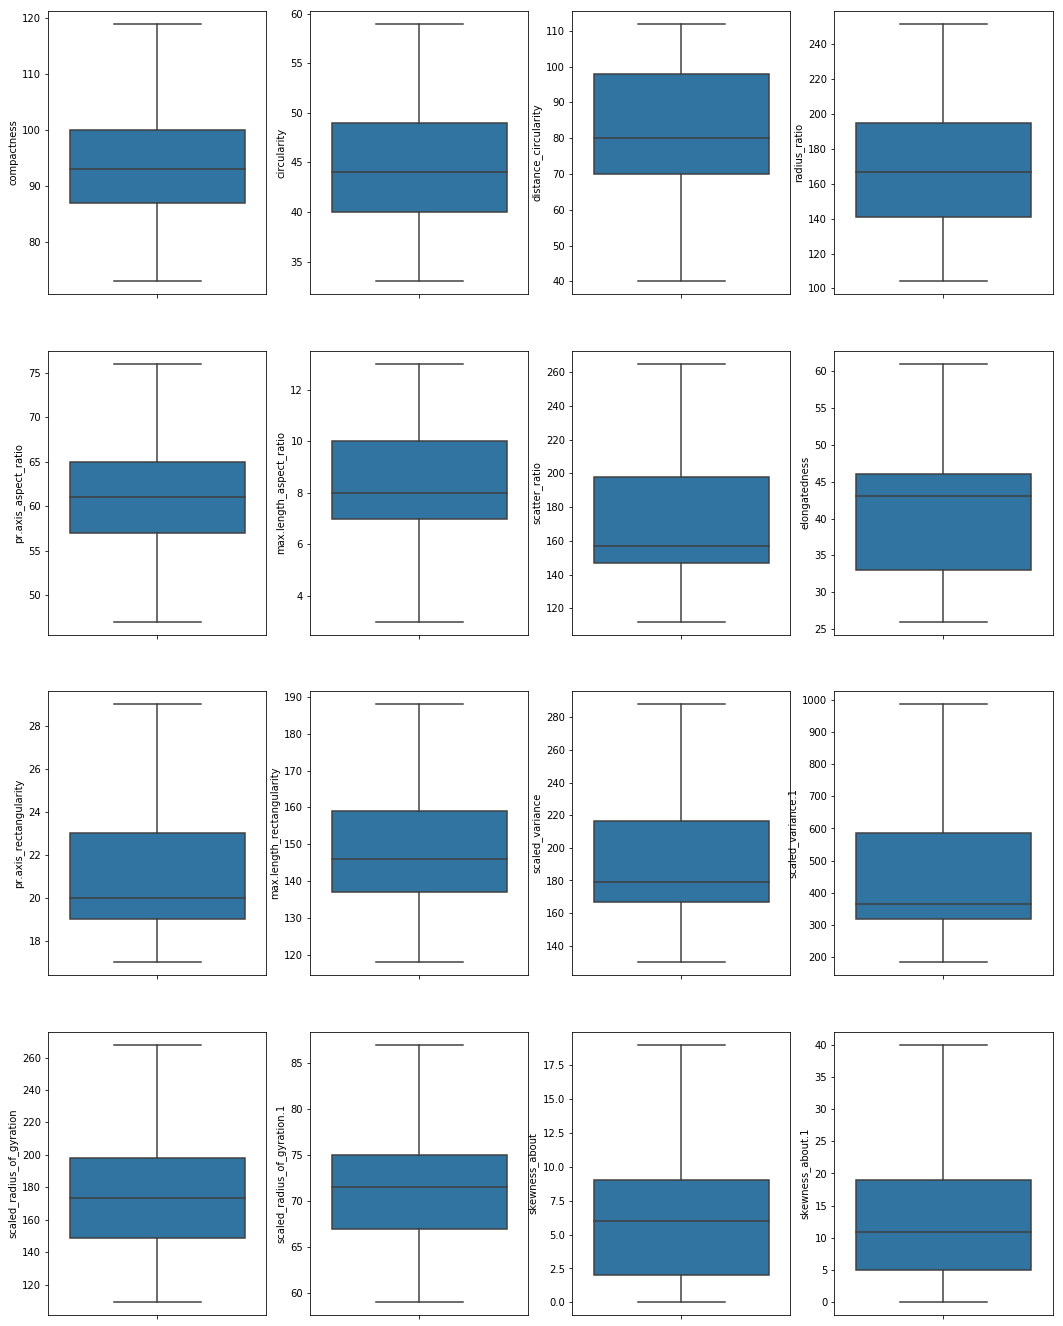

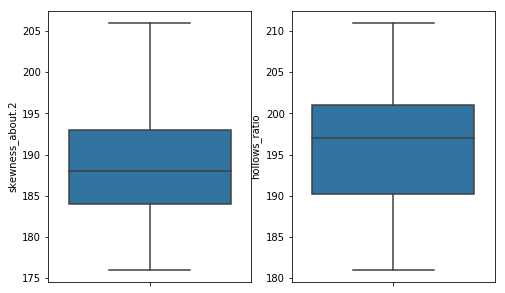

In [22]:

columns =  feature_column.columns
k=0
fig,ax1 = plt.subplots(nrows=4,ncols=4,figsize = (18,24))
fig,ax2 = plt.subplots(nrows=1,ncols=2,figsize = (8,5),squeeze=False)
for i in np.arange(4):
    for j in np.arange(4):
            sns.boxplot(y=vehicle_df[columns[k]],ax = ax1[i][j])
            k=k+1
for j in np.arange(0,2):
    sns.boxplot(y=vehicle_df[columns[k]],ax = ax2[0][j])
    k=k+1            

<b>Here we can observe from boxplot that the outliers have been removed from our data</b>

C:\Users\aman-pc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


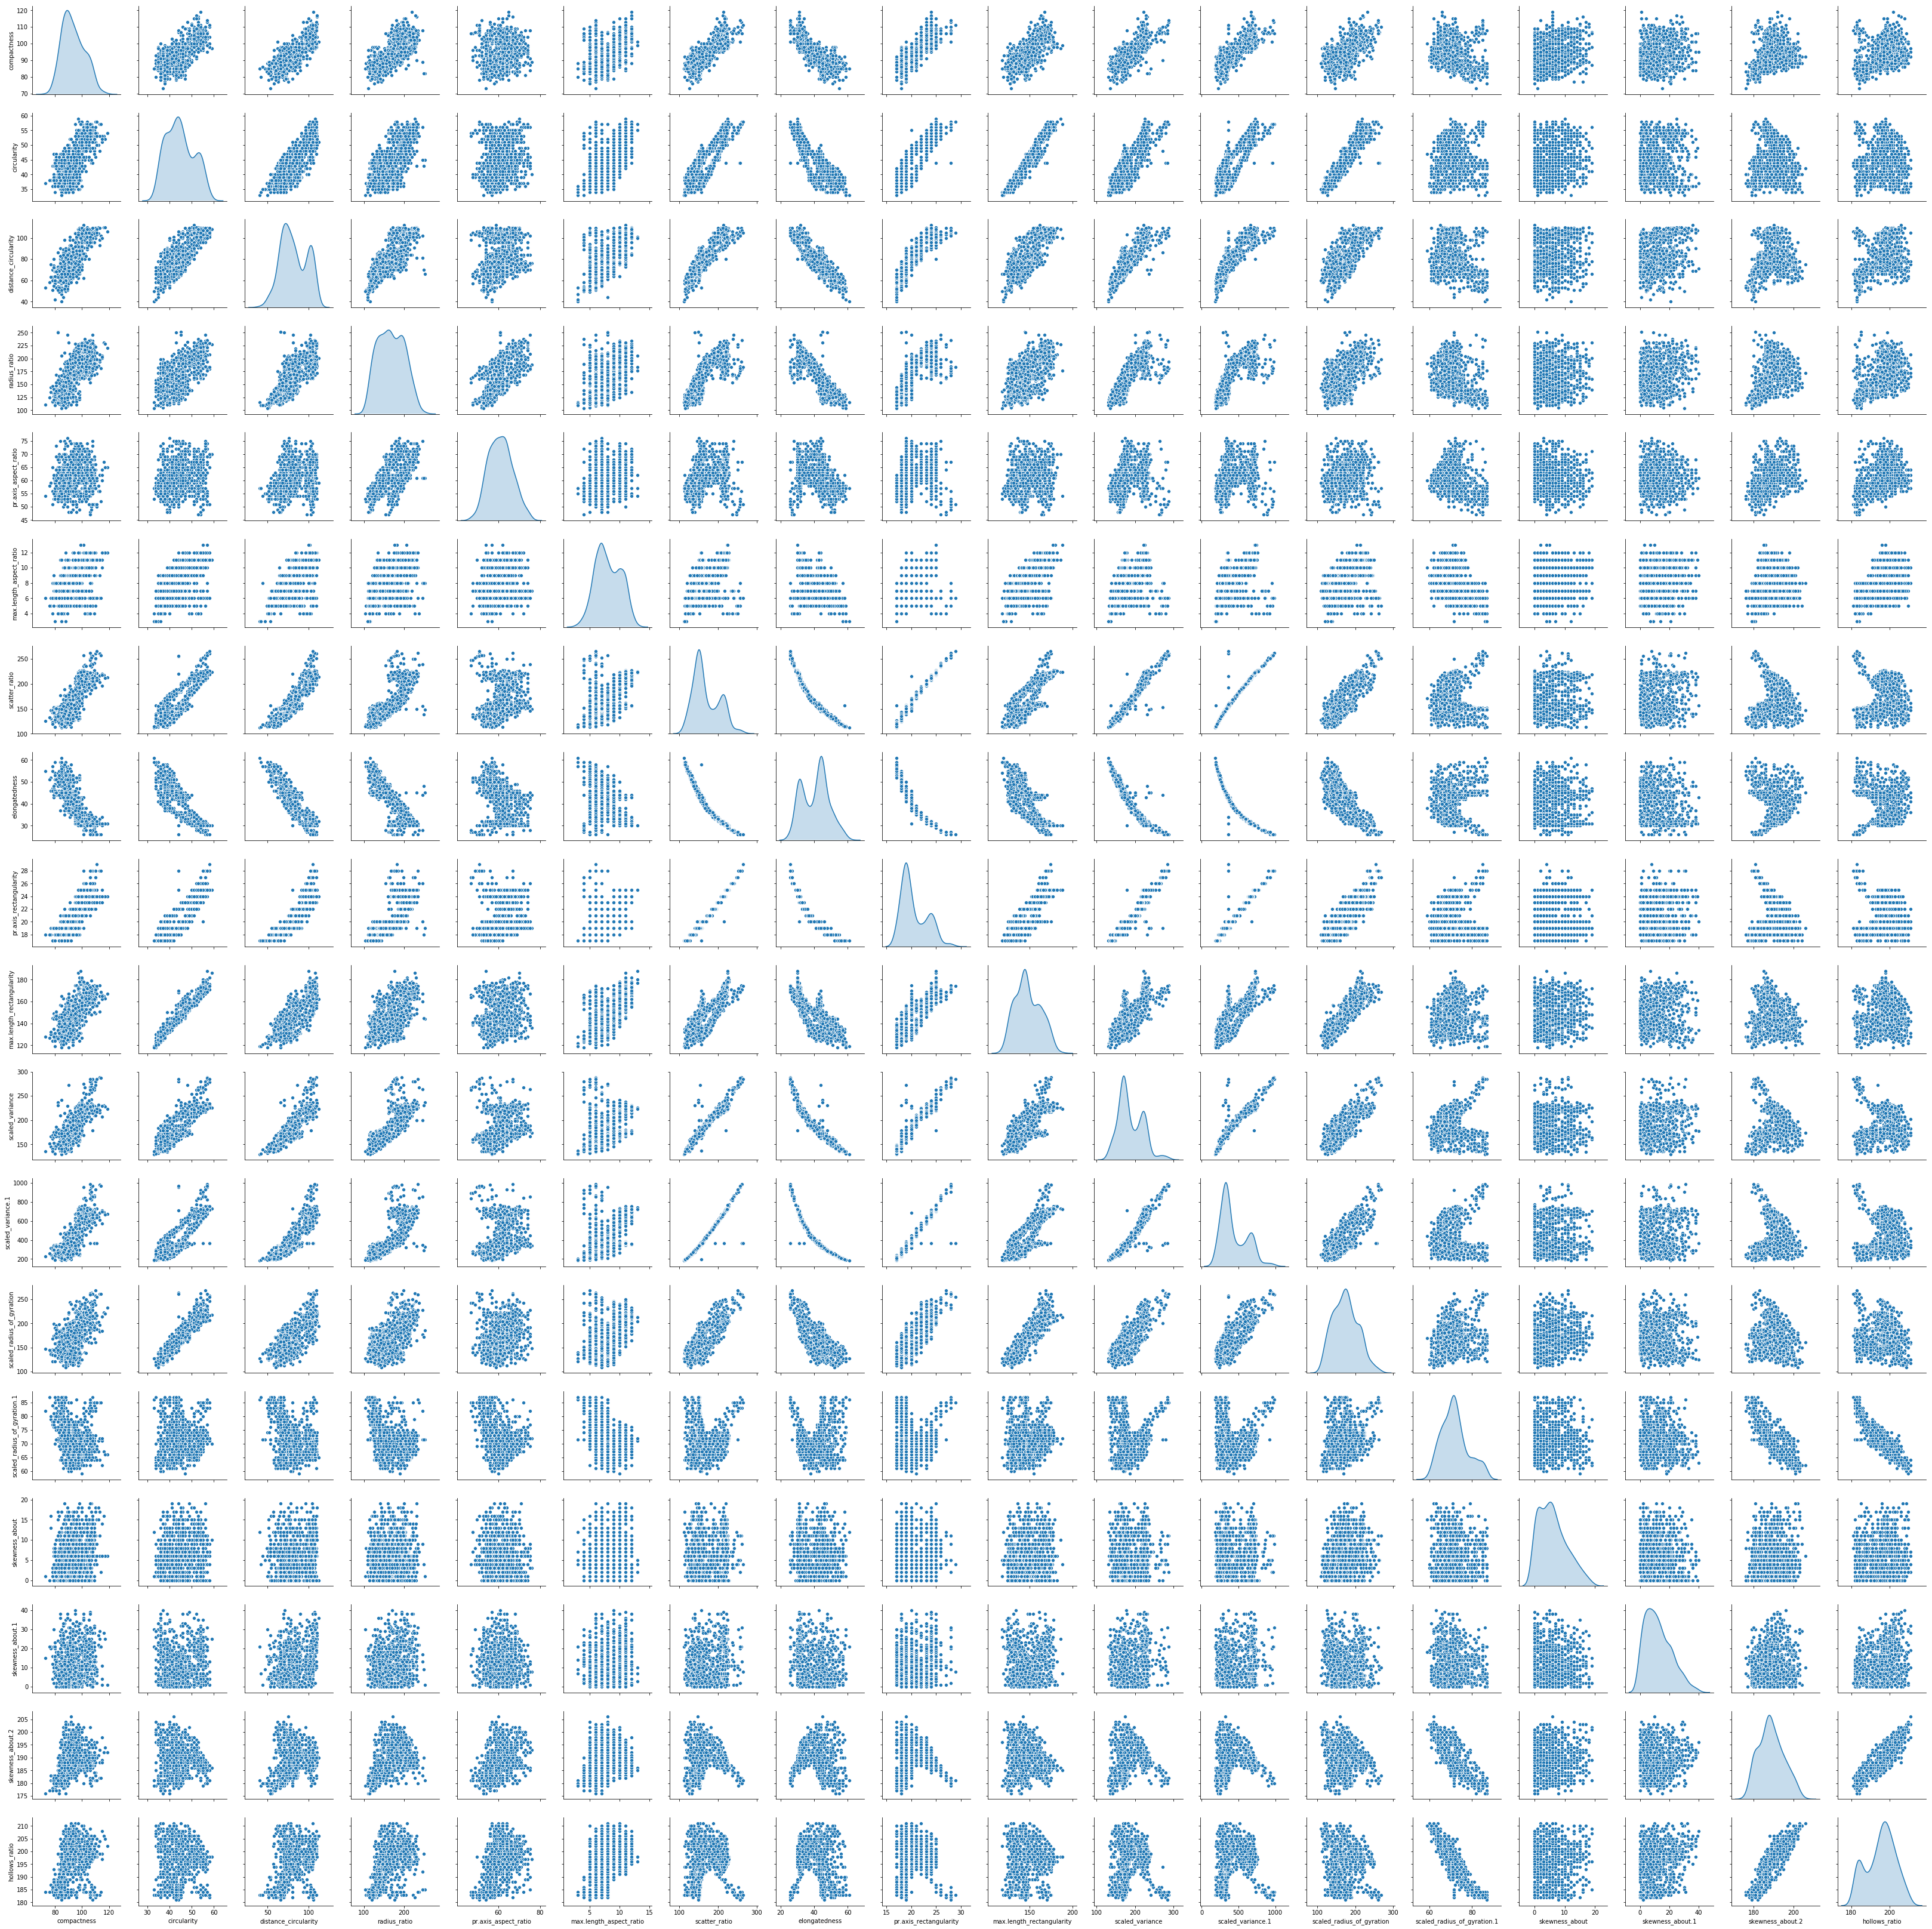

In [23]:
sns.pairplot(feature_column,diag_kind="kde")

The above pairplot shows that data is not normally distributed in maximum no. of columns like scaled_variance,scaled_variance_1 ,distance_circularity.There are some variable which are showing postive linear relation with other variables like compactness shows positive linear relation with circularity ,distance_circularity , radius_ratio and so on .Some varibale are also showing negative relation with other variables like scatter_ratio with elongatedness representing negative linear relation with each other

In [24]:
vehicle_df.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.721925     0.638280              0.794222   
pr.axis_aspect_ratio            0.192864     0.203253              0.244332   
max.length_aspect_ratio         0.499928     0.560470              0.666809   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.769871     0.802768              0.869584   
scaled_variance.1               0.806170     0.827462              0.883943   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.246681     0.068745             -0.229353   
skewness_about                  0.197308     0.136351              0.099107   
skewness_about.1                0.156348    -0.009666              0.262345   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.721925              0.192864   
circularity                      0.638280              0.203253   
distance_circularity             0.794222              0.244332   
radius_ratio                     1.000000              0.650554   
pr.axis_aspect_ratio             0.650554              1.000000   
max.length_aspect_ratio          0.463958              0.150295   
scatter_ratio                    0.769941              0.194195   
elongatedness                   -0.825392             -0.298144   
pr.axis_rectangularity           0.744139              0.163047   
max.length_rectangularity        0.579468              0.147592   
scaled_variance                  0.786183              0.207101   
scaled_variance.1                0.760257              0.196401   
scaled_radius_of_gyration        0.550774              0.148591   
scaled_radius_of_gyration.1     -0.390459             -0.321070   
skewness_about                   0.035755             -0.056030   
skewness_about.1                 0.179601             -0.021088   
skewness_about.2                 0.405849              0.400882   
hollows_ratio                    0.491758              0.415734   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.499928       0.812620   
circularity                                 0.560470       0.847938   
distance_circularity                        0.666809       0.905076   
radius_ratio                                0.463958       0.769941   
pr.axis_aspect_ratio                        0.150295       0.194195   
max.length_aspect_ratio                     1.000000       0.490759   
scatter_ratio                               0.490759       1.000000   
elongatedness                              -0.504181      -0.971601   
pr.axis_rectangularity                      0.487931       0.989751   
max.length_rectangularity                   0.642713       0.809083   
scaled_variance                             0.401391       0.960883   
scaled_variance.1                           0.463249       0.980447   
scaled_radius_of_gyration                   0.397397       0.799875   
scaled_radius_of_gyration.1                -0.335444       0.011314   
skewness_about                              0.081898       0.064242   
skewness_about.1                            0.141664       0.211647   
skewness_about.2                            0.

Here coefficient of correlation value which is in the range of -1 to 1 shows the relationship between two variables.Like compactness has strong correlation with scatter_ratio and pr.axis_rectangularity with r value 0.81. In the same way circularity has strong correlation with max.length.rectangularity which is 0.96. Also the r value is 0.9897 between pr.axis_rectangularity	 and scatter_ratio . Below is the graphical representation of the correlation matrix.

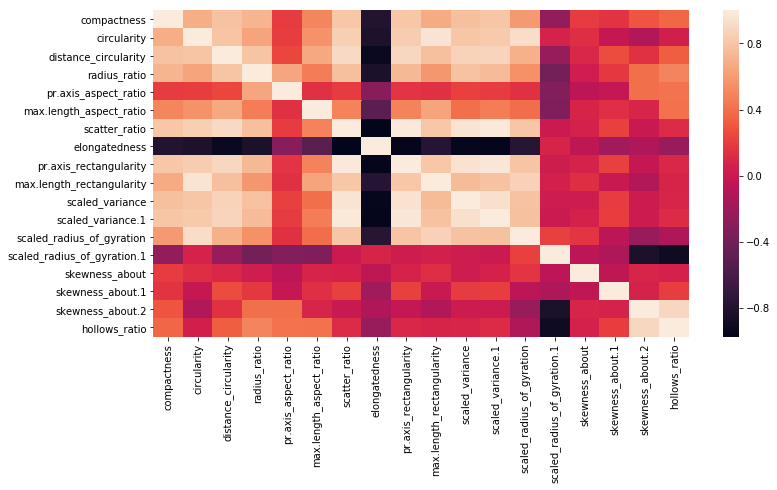

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(vehicle_df.corr())

In [26]:
# Scaling the data
vehicle_df_feature = vehicle_df.drop("class",axis=1)
vehicle_df_feature_z = vehicle_df_feature.apply(zscore)
vehicle_df_feature_z.head(3)

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.300945   
1    -0.325470    -0.623732              0.120741     -0.850666   
2     1.254193     0.844303              1.519141      1.265808   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.933135                 0.912212      -0.207598   
1             -0.740596                 0.427456      -0.599423   
2              0.863642                 0.912212       1.148719   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.400771          -0.337407                   0.285705   
1        -0.594220          -0.618623                  -0.513630   
2         1.114582           1.131806                   1.392477   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.315806       -0.032330          0.387162   
1                     0.009122        0.624090          0.161740   
2                     0.171586        1.718123         -0.401818   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447

## Machine Learning Models

### 1) Naive Bayes

Naive Bayes Assumes that the features in this data are independent of each other It works on the conditional Probability that something will happen when something has already occured

In [27]:
# train test split
X = vehicle_df_feature_z
y = vehicle_df["class"]

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.30, random_state = 101)
print("Total No. of records in X_train :",X_train.shape)
print("Total No. of records in X_test :",X_test.shape)
print("Total No. of records in y_train :",y_train.shape)
print("Total No. of records in y_test :",y_test.shape)

Total No. of records in X_train : (592, 18)
Total No. of records in X_test : (254, 18)
Total No. of records in y_train : (592,)
Total No. of records in y_test : (254,)


In [28]:
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()
naive_model.fit(X_train,y_train)
y_prediction = naive_model.predict(X_test)
naive_model.score(X_test,y_test)

0.6338582677165354

This 63.38 % showing the accuracy of our model so here we can say that our model is not a good predictor.

In [29]:
confusion_matrix_ = pd.DataFrame(data =  metrics.confusion_matrix(y_test,y_prediction),index=["Actual_Bus","Actual_Car","Actual_Van"],
                                columns=["Predicted_Bus","Predicted_Car","Predicted_Van"])
confusion_matrix_

Predicted_Bus  Predicted_Car  Predicted_Van
Actual_Bus             20             10             37
Actual_Car              1             86             42
Actual_Van              0              3             55

Here Confusion Matrix is showing actual Numbers on the row side and predicted numbers on the column side . Actual no. of records with bus in the test data was 20+10+37 = 67 out of which only 20 records were correctly predicted and rest 47 records were incorrectly predicted.In the same way Actual no. of records with Car in the test data was 1+86+42 = 129 out of which only 86 records were correctly predicted and rest 43 records were incorrectly predicted and In the case of van Actual no. of records with Van in the test data was 3+55 = 58 out of which  55 records were correctly predicted and rest 3 records were incorrectly predicted.

In [30]:
print(metrics.classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

         bus       0.95      0.30      0.45        67
         car       0.87      0.67      0.75       129
         van       0.41      0.95      0.57        58

   micro avg       0.63      0.63      0.63       254
   macro avg       0.74      0.64      0.59       254
weighted avg       0.79      0.63      0.63       254



Here recall percentage means correctly predicted observation out of the total observation of that particular class. Recall value is showing a good percentage only in case of Van and showing poor percentage in case of bus and car. Precision shows the percentage of correctly predicted observation out of total predicted observation of that particular class

<b>The reason why Naive Bayes is performed poorly is because of the data that we have contains feature columns that are mostly not independent of each other and for Naive Bayes Model, feature column should be independent of each other.</b>

### 2) Support Vector Machine

Support Vector Machine algorithm used for both classification as well as regression. It uses technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs.



In [31]:
from sklearn.svm import SVC
svc_model = SVC(kernel="rbf")
svc_model.fit(X_train,y_train)
y_prediction =  svc_model.predict(X_test)
svc_model.score(X_test,y_test)

C:\Users\aman-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9409448818897638

This 94 % showing the accuracy of our model. Which is indicating a good predictor model .

In [32]:
confusion_matrix_ = pd.DataFrame(data =  metrics.confusion_matrix(y_test,y_prediction),index=["Actual_Bus","Actual_Car","Actual_Van"],                                columns=["Predicted_Bus","Predicted_Car","Predicted_Van"])
confusion_matrix_

Predicted_Bus  Predicted_Car  Predicted_Van
Actual_Bus             65              1              1
Actual_Car              1            120              8
Actual_Van              0              4             54

Here Confusion Matrix is showing actual Numbers on the row side and predicted numbers on the column side . Actual no. of records with bus in the test data was 65+1+1 = 67 out of which 65 records were correctly predicted and rest 2 records were incorrectly predicted.In the same way Actual no. of records with Car in the test data was 1+120+8 = 129 out of which 120 records were correctly predicted and rest 9 records were incorrectly predicted and In the case of van Actual no. of records with Van in the test data was 4+54 = 58 out of which  54 records were correctly predicted and rest 4 records were incorrectly predicted.

In [33]:
print(metrics.classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

         bus       0.98      0.97      0.98        67
         car       0.96      0.93      0.94       129
         van       0.86      0.93      0.89        58

   micro avg       0.94      0.94      0.94       254
   macro avg       0.93      0.94      0.94       254
weighted avg       0.94      0.94      0.94       254



Here recall percentage means correctly predicted observation out of the total observation of that particular class. Recall value is showing a good 97 percentage  in case of Bus and also showing 93% percentage in case of van and car. Precision shows the percentage of correctly predicted observation out of total predicted observation of that particular class

Although 94% accuracy in model is some how good predictor but lets improve it by removing some unnecessary dimentions from our dataset by using PCA

### Principal Component Analysis

In [34]:
vehicle_df_feature_z.shape

(846, 18)

For PCA here I am taking all 18 independent  column 

In [35]:
# Creating a covariance Matrix
cov_matrix = np.cov(vehicle_df_feature_z.T)
cov_matrix_df = pd.DataFrame(cov_matrix,columns=vehicle_df_feature_z.columns,index=vehicle_df_feature_z.columns)
cov_matrix_df

compactness  circularity  distance_circularity  \
compactness                     1.001183     0.685698              0.790863   
circularity                     0.685698     1.001183              0.793258   
distance_circularity            0.790863     0.793258              1.001183   
radius_ratio                    0.722780     0.639035              0.795162   
pr.axis_aspect_ratio            0.193093     0.203493              0.244622   
max.length_aspect_ratio         0.500519     0.561133              0.667598   
scatter_ratio                   0.813582     0.848941              0.906147   
elongatedness                  -0.789683    -0.822444             -0.912385   
pr.axis_rectangularity          0.814657     0.844398              0.894082   
max.length_rectangularity       0.676943     0.962456              0.775444   
scaled_variance                 0.770782     0.803718              0.870613   
scaled_variance.1               0.807124     0.828442              0.884989   
scaled_radius_of_gyration       0.585935     0.926912              0.706607   
scaled_radius_of_gyration.1    -0.246972     0.068827             -0.229624   
skewness_about                  0.197542     0.136512              0.099224   
skewness_about.1                0.156533    -0.009678              0.262656   
skewness_about.2                0.298890    -0.104550              0.146271   
hollows_ratio                   0.365984     0.046406              0.333126   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.722780              0.193093   
circularity                      0.639035              0.203493   
distance_circularity             0.795162              0.244622   
radius_ratio                     1.001183              0.651324   
pr.axis_aspect_ratio             0.651324              1.001183   
max.length_aspect_ratio          0.464507              0.150473   
scatter_ratio                    0.770852              0.194425   
elongatedness                   -0.826369             -0.298497   
pr.axis_rectangularity           0.745020              0.163240   
max.length_rectangularity        0.580154              0.147766   
scaled_variance                  0.787114              0.207346   
scaled_variance.1                0.761157              0.196633   
scaled_radius_of_gyration        0.551426              0.148767   
scaled_radius_of_gyration.1     -0.390921             -0.321450   
skewness_about                   0.035797             -0.056096   
skewness_about.1                 0.179813             -0.021113   
skewness_about.2                 0.406330              0.401356   
hollows_ratio                    0.492340              0.416226   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.500519       0.813582   
circularity                                 0.561133       0.848941   
distance_circularity                        0.667598       0.906147   
radius_ratio                                0.464507       0.770852   
pr.axis_aspect_ratio                        0.150473       0.194425   
max.length_aspect_ratio                     1.001183       0.491339   
scatter_ratio                               0.491339       1.001183   
elongatedness                              -0.504778      -0.972751   
pr.axis_rectangularity                      0.488509       0.990922   
max.length_rectangularity                   0.643474       0.810041   
scaled_variance                             0.401866       0.962020   
scaled_variance.1                           0.463797       0.981607   
scaled_radius_of_gyration                   0.397867       0.800821   
scaled_radius_of_gyration.1                -0.335841       0.011327   
skewness_about                              0.081995       0.064318   
skewness_about.1                            0.141831       0.211897   
skewness_about.2                            0.

Covariance matrix is nothing but the numerical view of the pair plot. Here Some variable showing strong relation between themselves like scaled_variance.1 and scatter ratio shows strong relation of 0.98 . In the same way pr.axis_rectangularity and scatter ratio shows strong relation of 0.99. So there are many variable which have strong relation with other variables and taking 2 variable with strong relation with each other for creating a model means we are proving the same information two times  It will increase curse of dimentionality. So by using PCA we will reduce the no. of columns that have strong relation with each other by taking PCA with Maximum information

In [36]:
# Getting Eigen values and Eigen Vectors and sorting them in descending order

eigen_values , eigen_vectors =  np.linalg.eig(cov_matrix_df)
eigen_values = pd.Series(eigen_values,name="Eigen_values")
eigen_vectors =  eigen_vectors.T
eigen_vectors = pd.DataFrame(eigen_vectors)
eig_pairs = pd.concat(objs=[eigen_values,eigen_vectors],join="inner",axis=1)
sorted_eigen_pairs = eig_pairs.sort_values(by="Eigen_values",ascending =False).reset_index(drop=True)
sorted_eigen_values = sorted_eigen_pairs["Eigen_values"]
sorted_eigen_vectors = sorted_eigen_pairs.drop(labels ="Eigen_values",axis=1)

In [37]:
# Finding variance and cummulative variance by each vector
total = sum(sorted_eigen_values)
individual_variance = (sorted_eigen_values/total)*100
cumm_variance =  np.cumsum(individual_variance)
print("Indvidual Variance", list(individual_variance))
print("__________________________________________________"*2)
print("Commulative Variance" , cumm_variance)

Indvidual Variance [54.09932540403042, 18.593102547307357, 6.616511726791585, 6.291549730210741, 4.90529109957348, 3.697101095936824, 1.7654158037746583, 1.26616348231962, 0.7270207045005724, 0.4431528411032863, 0.40728438345286244, 0.35855493505171493, 0.22276340010276516, 0.1790983147033691, 0.16310498052281192, 0.12596496074176278, 0.10994586477758078, 0.028648725098569392]
____________________________________________________________________________________________________
Commulative Variance 0      54.099325
1      72.692428
2      79.308940
3      85.600489
4      90.505781
5      94.202882
6      95.968297
7      97.234461
8      97.961482
9      98.404634
10     98.811919
11     99.170474
12     99.393237
13     99.572335
14     99.735440
15     99.861405
16     99.971351
17    100.000000
Name: Eigen_values, dtype: float64


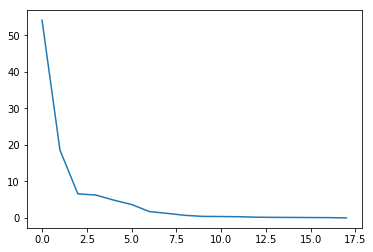

In [38]:
# Below is the graphical representation of the individual Variance
plt.plot(individual_variance)

Here we can say maximum information contained in PCA 1 and 2 and after that it reduces .

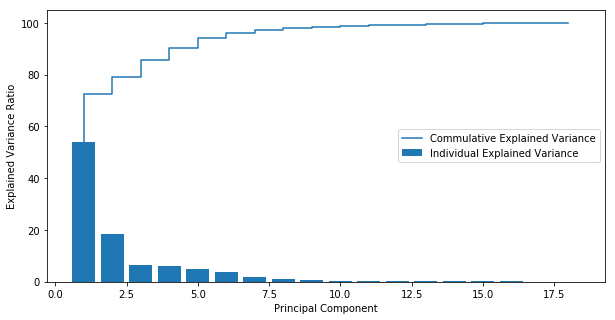

In [39]:
plt.figure(figsize=(10,5))
plt.bar(x = np.arange(1,eigen_values.size+1),height=individual_variance,align="center",label = "Individual Explained Variance")
plt.step(x=np.arange(1,eigen_values.size+1),y=cumm_variance,label = "Commulative Explained Variance")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.legend(loc="center right")
plt.show()

Here I am going to take only 7 PCA out of total 18 PCA. Because these 7 PCA contains 95.97% of the total data information

In [40]:
# Selecting only 7 Principal Components which contains maximum information
selected_eigen_vectors = sorted_eigen_vectors[0:7]
selected_eigen_vectors

0         1         2         3         4         5         6   \
0 -0.272503 -0.287255 -0.302421 -0.269714 -0.097861 -0.195200 -0.310524   
1 -0.087044  0.131622 -0.046143 -0.197931 -0.257840 -0.108046  0.075285   
2  0.038185  0.201147 -0.063462 -0.056285  0.061993  0.148958 -0.109043   
3  0.138675 -0.038055  0.108954 -0.254355 -0.612766  0.278678  0.005393   
4 -0.137101  0.138996  0.080017 -0.133744 -0.123601  0.634893 -0.085557   
5  0.263611 -0.071347 -0.016901 -0.138184 -0.577829 -0.289097  0.097747   
6  0.202717 -0.392275  0.163371  0.161911  0.092763  0.398266  0.092352   

         7         8         9         10        11        12        13  \
0  0.309007 -0.307287 -0.278154 -0.299765 -0.305532 -0.263238  0.041936   
1 -0.013230  0.087560  0.122154  0.077266  0.071503  0.210582  0.503622   
2  0.090853 -0.106070  0.213685 -0.144600 -0.110344  0.202870 -0.073864   
3  0.065215  0.030899  0.041467 -0.064005 -0.002197 -0.085540 -0.115400   
4  0.079073 -0.081646  0.251113 -0.147471 -0.110101  0.005212 -0.138069   
5 -0.075728  0.105403 -0.078196  0.132912  0.115398 -0.067057 -0.131513   
6 -0.104071  0.093132 -0.354564  0.068055  0.090119 -0.455293  0.085823   

         14        15        16        17  
0 -0.036083 -0.058720 -0.038013 -0.084740  
1 -0.015766 -0.092746 -0.501621 -0.507612  
2  0.559174 -0.670680  0.062241  0.041705  
3  0.473703  0.428426 -0.027410  0.096037  
4 -0.566552 -0.130870 -0.180519  0.110788  
5 -0.319176 -0.468405  0.280136  0.059444  
6  0.124532 -0.302518 -0.258250 -0.173269

<b>Here First row showing First Eigen vector or First Principal Component , Second row showing Second Eigen Vector or Second Principal Component and continues till 7th row</b>

In [41]:
# Changing original data according to the vector
vehicle_df_7D = np.dot(vehicle_df_feature_z,selected_eigen_vectors.T)
print(vehicle_df_7D.shape)
vehicle_df_7D

(846, 7)


array([[-0.58422804, -0.67567325,  0.45333356, ...,  0.77751466,
        -1.84880885, -0.18041487],
       [ 1.5121798 , -0.34893367,  0.33343619, ...,  0.32492864,
        -0.11831711,  0.20330786],
       [-3.91344816,  0.2345073 ,  1.26509352, ..., -0.91575098,
        -0.68559401,  0.81158817],
       ...,
       [-5.12009307, -0.18227007,  0.50836783, ...,  1.32038003,
         0.17264281,  0.88474898],
       [ 3.29709502, -1.10194286, -1.93384417, ...,  0.5020676 ,
         0.02003876, -0.26057897],
       [ 4.96759448,  0.42274968, -1.30871531, ...,  0.17468618,
         0.38469257, -0.39384302]])

## Machine Learning Models after applying PCA in data

### 1) Naive Bayes

In [42]:
X = vehicle_df_7D
y = vehicle_df["class"]

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.30, random_state = 101)

naive_model = GaussianNB()
naive_model.fit(X_train,y_train)
y_prediction = naive_model.predict(X_test)
naive_model.score(X_test,y_test)

0.7637795275590551

The Overall accuracy after using PCA has increased from 63.38% to 76.37 % in Naive Bayes Model.

### 2) Support Vector Machine

In [43]:
# Trying with 7 dimentions
X = vehicle_df_7D
y = vehicle_df["class"]

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.30, random_state = 101)

svc_model = SVC(kernel="rbf",gamma="auto")
svc_model.fit(X_train,y_train)
y_prediction =  svc_model.predict(X_test)
svc_model.score(X_test,y_test)

0.9094488188976378

The Overall Accuracy of SVM has decreased from 94% to 90.9 %.

<b>Let see what overall score we can get by applying n_component from 1 to 10 in both naive bayes and SVM</b>

In [49]:
from sklearn.decomposition import PCA

for n in np.arange(1,10):
    pca =  PCA(n_components= n)
    vehicle_df_reduced_data = pca.fit_transform(vehicle_df_feature_z)
    X = vehicle_df_reduced_data
    y = vehicle_df["class"]
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.30, random_state = 101)
    naive_model = GaussianNB()
    naive_model.fit(X_train,y_train)
    svc_model = SVC(kernel="rbf",gamma="auto")
    svc_model.fit(X_train,y_train)
    print("For Component ",n,"Overall Accuracy for Naive Bayes Model" , np.round(naive_model.score(X_test,y_test),4),"Overall Accuracy for Support Vector Model",
          np.round(svc_model.score(X_test,y_test),4))
        

For Component  1 Overall Accuracy for Naive Bayes Model 0.5157 Overall Accuracy for Support Vector Model 0.6063
For Component  2 Overall Accuracy for Naive Bayes Model 0.5669 Overall Accuracy for Support Vector Model 0.7047
For Component  3 Overall Accuracy for Naive Bayes Model 0.6535 Overall Accuracy for Support Vector Model 0.7008
For Component  4 Overall Accuracy for Naive Bayes Model 0.7283 Overall Accuracy for Support Vector Model 0.8189
For Component  5 Overall Accuracy for Naive Bayes Model 0.7717 Overall Accuracy for Support Vector Model 0.8937
For Component  6 Overall Accuracy for Naive Bayes Model 0.7835 Overall Accuracy for Support Vector Model 0.9134
For Component  7 Overall Accuracy for Naive Bayes Model 0.7638 Overall Accuracy for Support Vector Model 0.9094
For Component  8 Overall Accuracy for Naive Bayes Model 0.7992 Overall Accuracy for Support Vector Model 0.9291
For Component  9 Overall Accuracy for Naive Bayes Model 0.811 Overall Accuracy for Support Vector Model 

For Naive Bayes I would suggest to go for 9 components that will give 81.1% accuracy in test data  which is 17.72% more than the previous model without using PCA and for Support Vector classification I would suggest to go for 8 Components that will give 92.91% accuracy in test data . Although this accuracy is 1.18% less than the accuracy in previous model but still we manage to reduce from 18 to 8 columns in the data.